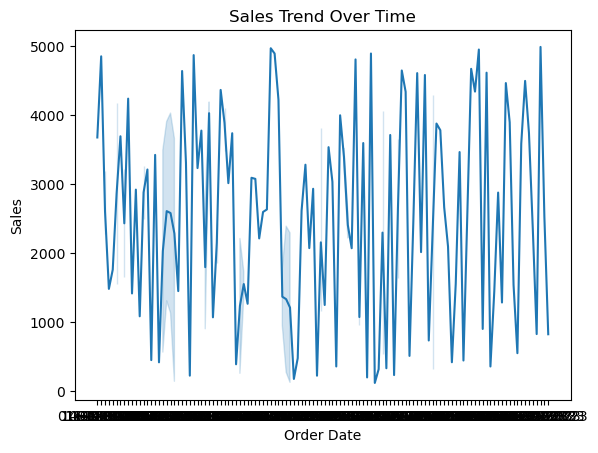

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("sales.csv")

sns.lineplot(x="Order Date", y="Sales", data=df)
plt.title("Sales Trend Over Time")
plt.show()

Region
East      80323.03
North     80595.55
South     86076.09
West     124423.23
Name: Sales, dtype: float64


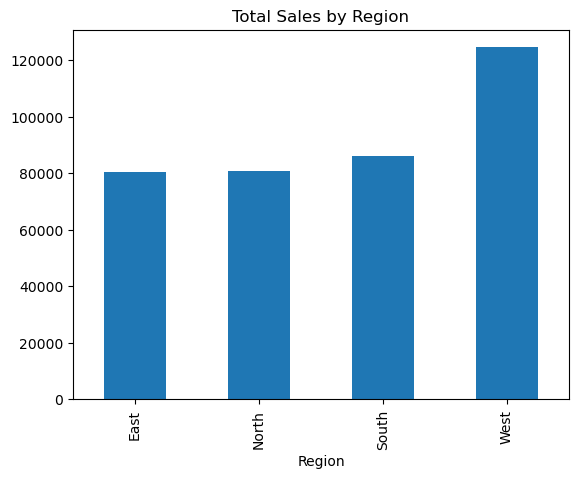

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("sales.csv")
region_sales = df.groupby("Region")["Sales"].sum()
print(region_sales)

region_sales.plot(kind="bar")
plt.title("Total Sales by Region")
plt.show()


In [3]:
import pandas as pd
df = pd.read_csv("sales.csv")
print(df)
print(df.shape)
print(df.columns)
print(df.head())  # first 5 rows
print(df.tail(10))  # last 10 rows
print("Shape of data:", df.shape)
df.info()

     Order ID  Order Date Region         Category  Product Customer Name  \
0        1001  01-08-2023  South        Furniture    Phone    Customer E   
1        1002  14-04-2023   East       Technology    Table    Customer A   
2        1003  16-06-2023   West  Office Supplies    Phone    Customer E   
3        1004  08-03-2023  North       Technology    Table    Customer D   
4        1005  14-08-2023   East        Furniture  Printer    Customer D   
..        ...         ...    ...              ...      ...           ...   
145      1146  24-03-2023   East       Technology     Desk    Customer B   
146      1147  22-11-2023   West       Technology  Printer    Customer D   
147      1148  05-10-2023  North        Furniture    Table    Customer A   
148      1149  10-09-2023  South        Furniture      Pen    Customer A   
149      1150  11-07-2023  North        Furniture  Monitor    Customer D   

     Quantity    Sales  
0           3  3676.96  
1           5  4854.07  
2           

In [4]:
import pandas as pd
df = pd.read_csv("sales.csv")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])

X = df[["Quantity", "Category"]]
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))

MAE: 1250.14336937369


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
df = pd.read_csv("sales.csv")
df["High_Sales"] = df["Sales"].apply(
    lambda x: 1 if x >= df["Sales"].median() else 0
)

X = df[["Quantity"]]
y = df["High_Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5


   Order ID  Order Date Region         Category  Product Customer Name  \
0      1001  01-08-2023  South        Furniture    Phone    Customer E   
1      1002  14-04-2023   East       Technology    Table    Customer A   
2      1003  16-06-2023   West  Office Supplies    Phone    Customer E   
3      1004  08-03-2023  North       Technology    Table    Customer D   
4      1005  14-08-2023   East        Furniture  Printer    Customer D   

   Quantity    Sales  
0         3  3676.96  
1         5  4854.07  
2         3  2282.83  
3         5  1480.56  
4         1  1758.92  
     Order ID  Order Date Region    Category  Product Customer Name  Quantity  \
145      1146  24-03-2023   East  Technology     Desk    Customer B         6   
146      1147  22-11-2023   West  Technology  Printer    Customer D         9   
147      1148  05-10-2023  North   Furniture    Table    Customer A         2   
148      1149  10-09-2023  South   Furniture      Pen    Customer A         5   
149      115

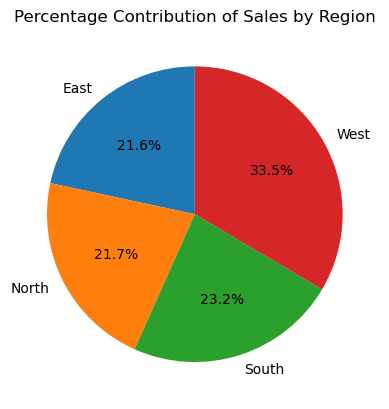

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("sales.csv")
print(df.head())
print(df.tail())
region_sales = df.groupby("Region")["Sales"].sum()

plt.pie(
    region_sales,
    labels=region_sales.index,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Percentage Contribution of Sales by Region")
plt.show()


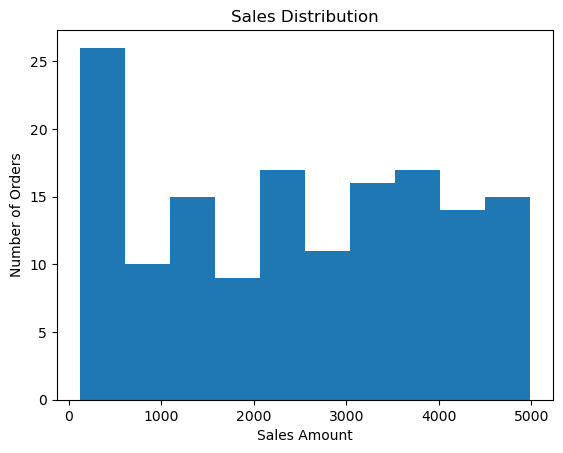

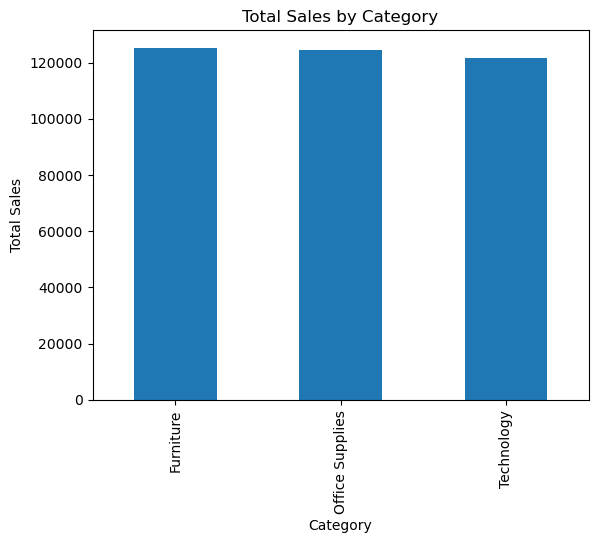

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("sales.csv")
plt.hist(df["Sales"], bins=10)
plt.xlabel("Sales Amount")
plt.ylabel("Number of Orders")
plt.title("Sales Distribution")
plt.show()
category_sales = df.groupby("Category")["Sales"].sum()

category_sales.plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Category")
plt.show()

In [8]:
import pandas as pd
df = pd.read_csv("sales.csv")


mean_sales = df["Sales"].mean()
median_sales = df["Sales"].median()

print("Mean Sales:", mean_sales)
print("Median Sales:", median_sales)

agg_region = df.groupby("Region")["Sales"].agg(["sum", "mean", "median"])
print(agg_region)



Mean Sales: 2476.1193333333335
Median Sales: 2509.8549999999996
              sum         mean    median
Region                                  
East     80323.03  2231.195278  2145.235
North    80595.55  2370.457353  2301.345
South    86076.09  2689.877812  3101.335
West    124423.23  2592.150625  2824.700


R2 Score: -0.08761743753604168


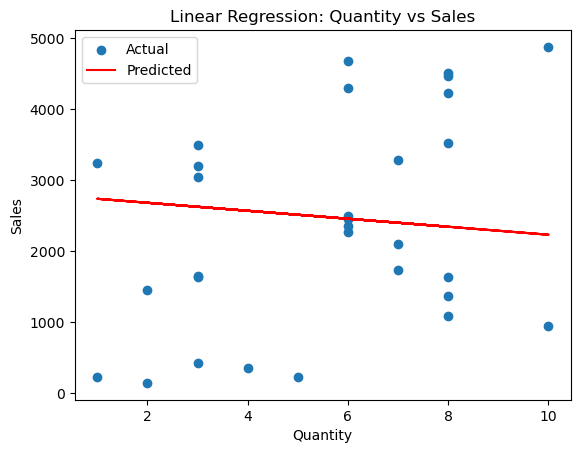

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
df = pd.read_csv("sales.csv")
X = df[["Quantity"]]
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))

plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_test, y_pred, color="red", label="Predicted")
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.title("Linear Regression: Quantity vs Sales")
plt.legend()
plt.show()